
# Linear Regression

This notebook guides you through the key topics of **Linear Regression** introduced in Lecture 2. It demonstrates how to formulate a linear regression problem, defines the residual sum of squares (RSS) cost function, and shows how to find optimal weights using both the **ordinary least squares (OLS)** closed‑form solution and an **iterative gradient descent** algorithm.



## 1 Definitions and problem formulation

**Regression** is the task of predicting a continuous output (dependent variable) from one or more input features (independent variables). In **linear regression**, the model is assumed to be a linear combination of the inputs and unknown parameters (weights).  

* **Simple linear regression** uses a single input feature.  
* **Multiple linear regression** uses multiple input features to predict a single output.  
* **Multivariate linear regression** generalizes to multiple outputs.



## 2 Generating a synthetic dataset

To illustrate linear regression, we'll generate a simple synthetic dataset with one input feature and an intercept term. We'll choose a true linear relationship and add Gaussian noise to simulate measurement error.
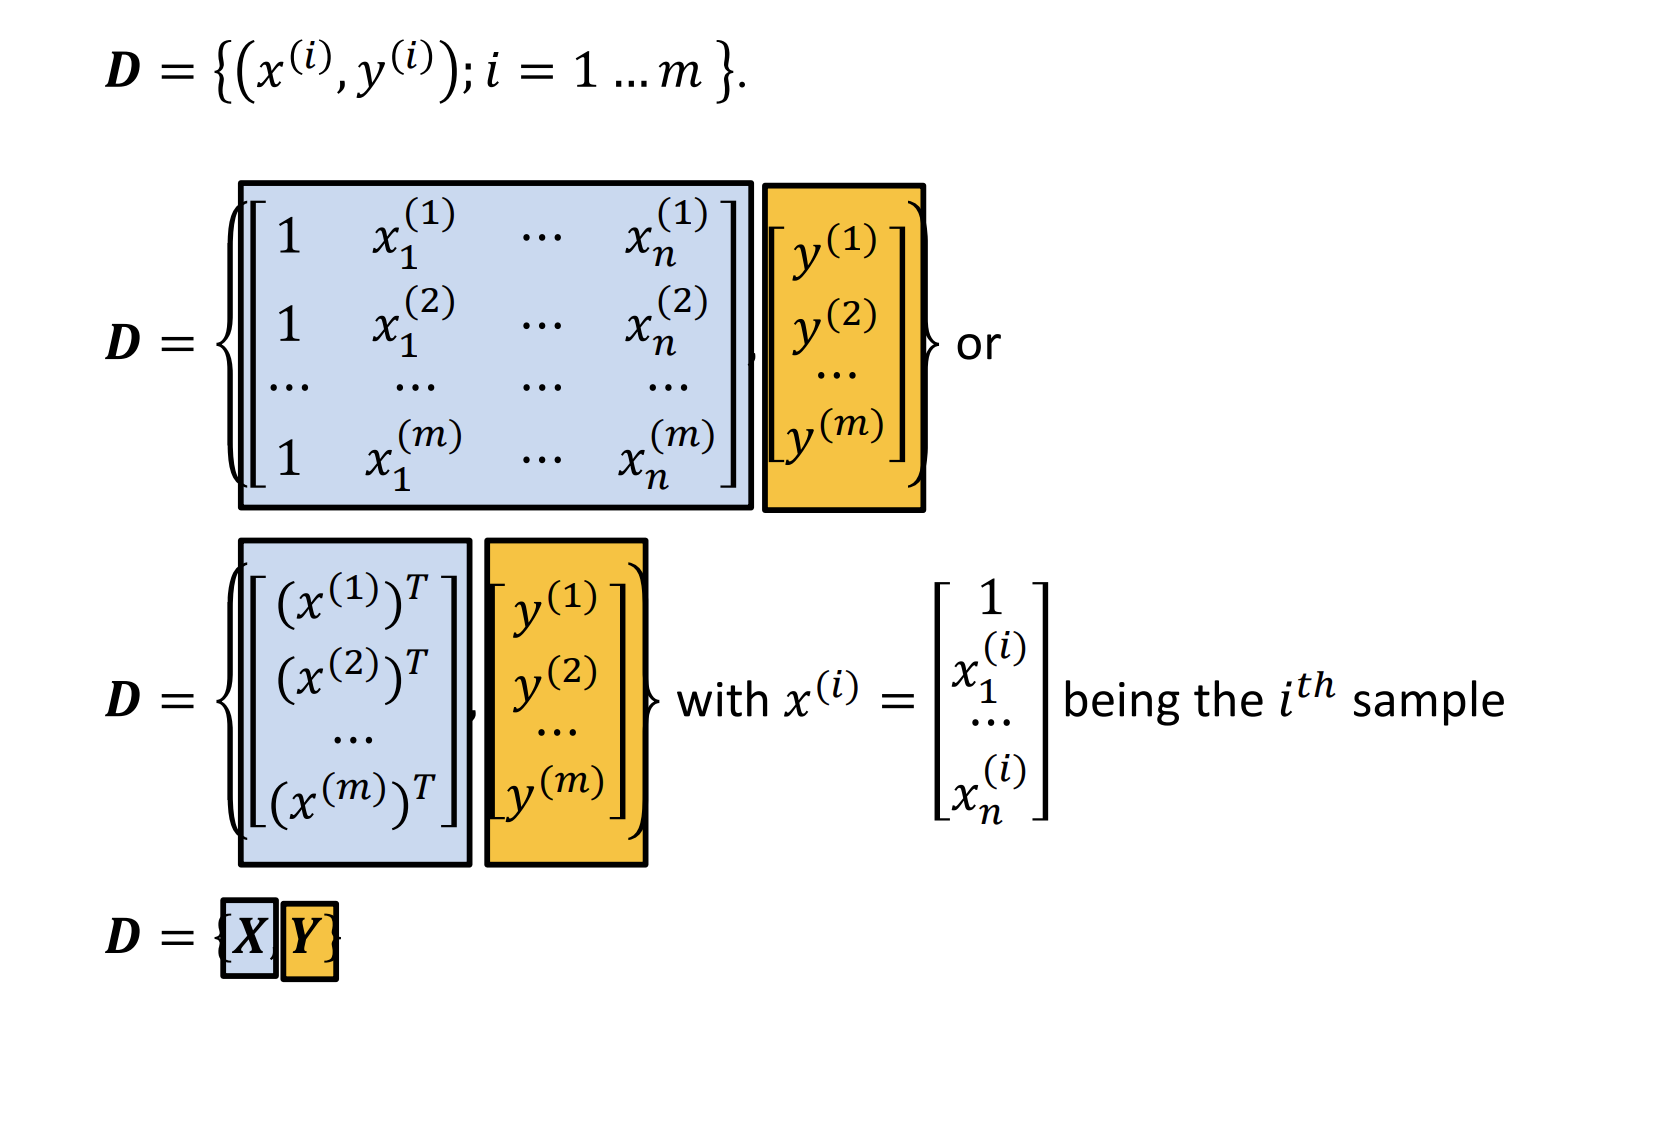


We will use 1-D x for today but x can be n-D.

          x         y
0  0.749080  6.290764
1  1.901429  9.554782
2  1.463988  8.437844
3  1.197317  6.598166
4  0.312037  4.826276


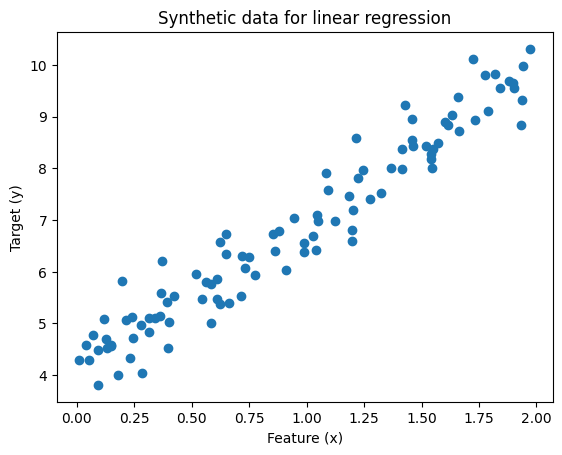

In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate m data points for a single feature
m = 100
X_feature = 2 * np.random.rand(m, 1)  # feature values between 0 and 2

# True parameters: intercept and slope
true_intercept = 4.0
true_slope = 3.0

# Generate noisy targets
y_true = true_intercept + true_slope * X_feature.flatten()
noise = np.random.randn(m) * 0.5  # Gaussian noise with std deviation 0.5
y = y_true + noise

# Create design matrix with intercept term
X = np.c_[np.ones(m), X_feature]  # shape (m, 2)

# Quick look at the data
data = pd.DataFrame({"x": X_feature.flatten(), "y": y})
print(data.head())

# Plot the data
a = plt.scatter(data["x"], data["y"])
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Synthetic data for linear regression")
plt.show()



## 3 Residual sum of squares (RSS)

The residual sum of squares is used as the objective (loss) function for linear regression.


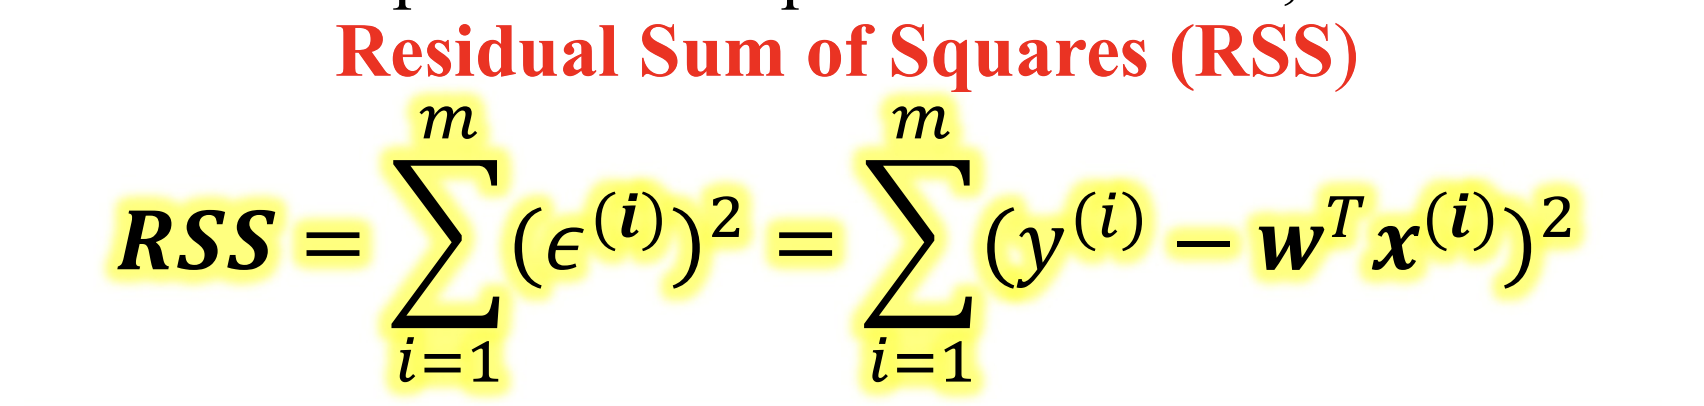

In [2]:

# Function to compute RSS
def compute_rss(X, y, w):
    residuals = # - #
    return np.sum(residuals ** 2)

# Example: compute RSS using initial weights of zeros
initial_w = np.zeros(X.shape[1])
rss0 = compute_rss(X, y, initial_w)
print(f"RSS with zero weights: {rss0:.2f}")


RSS with zero weights: 4963.85



## 4 Ordinary Least Squares (OLS) solution

To find the weights that minimize RSS analytically, we can derive the normal equation.  
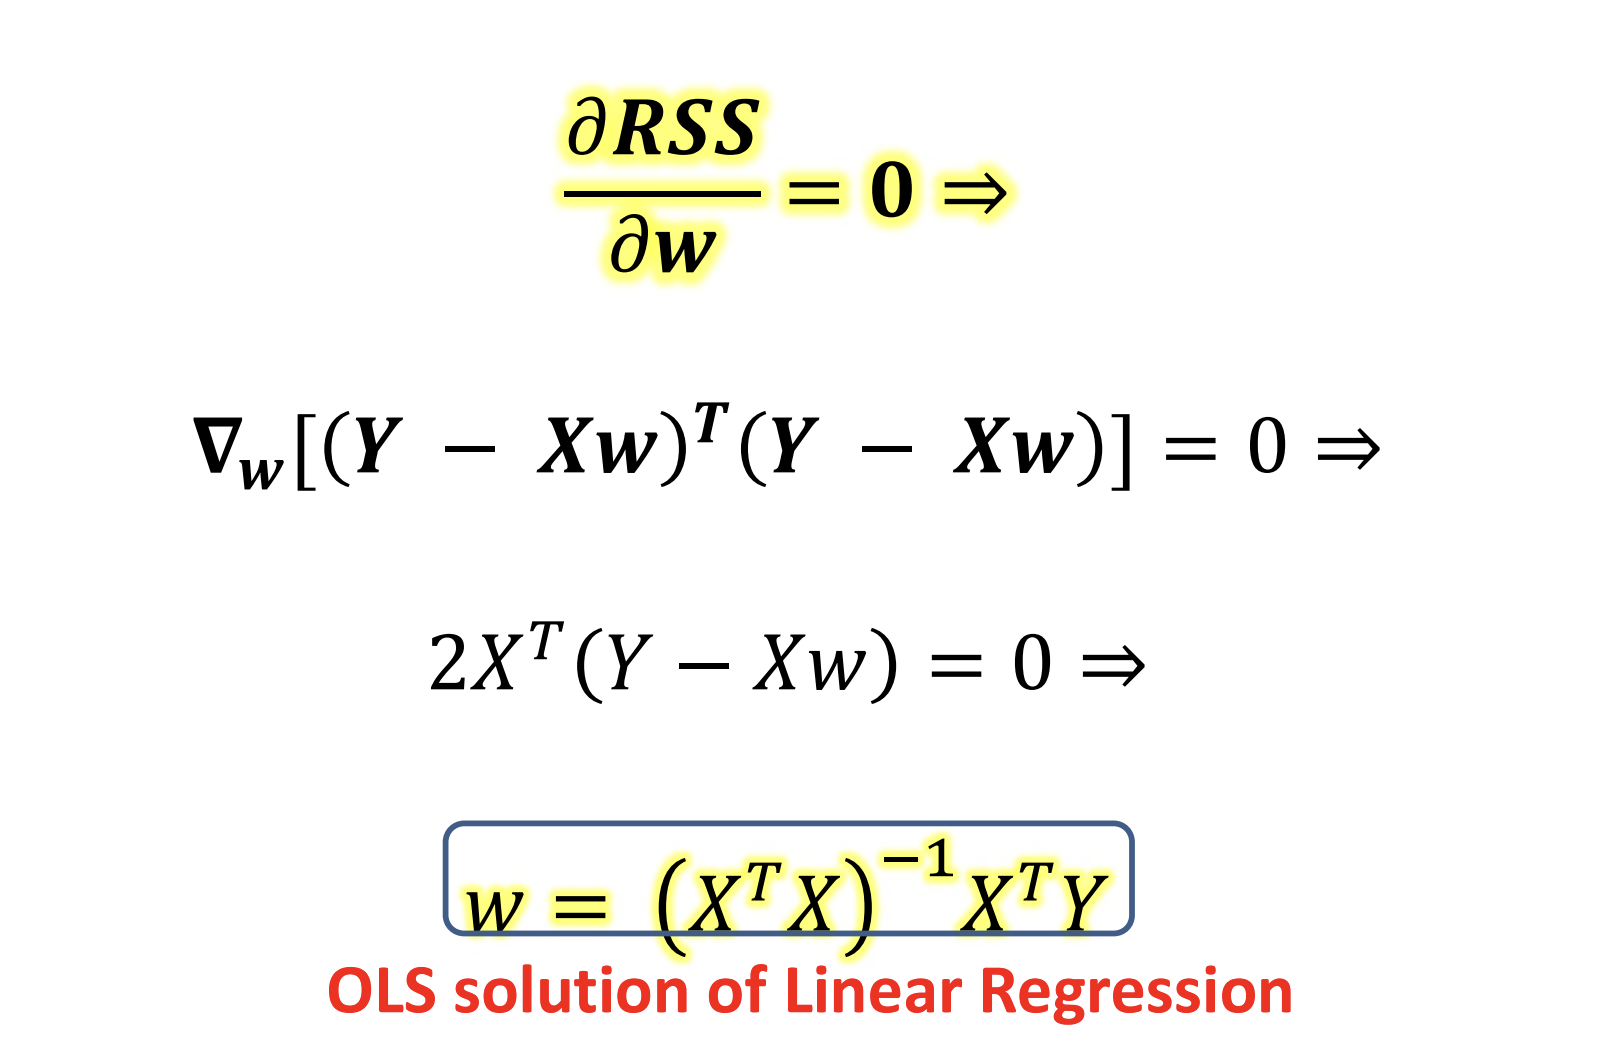

The code below computes this closed‑form solution and compares the result to the true parameters.


OLS weights: w0 = 4.108, w1 = 2.885
True parameters: intercept = 4.0, slope = 3.0


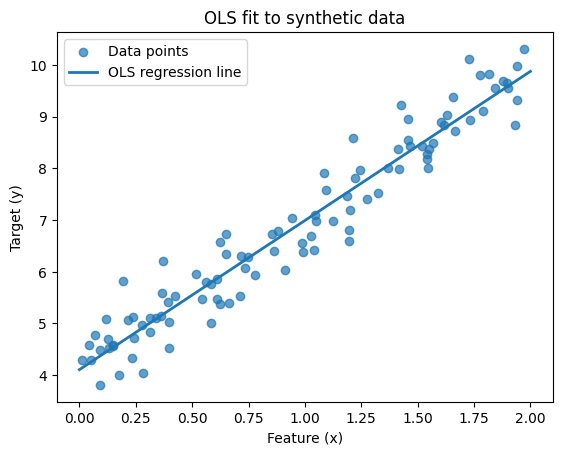

In [3]:

# Compute OLS solution using the normal equation
XTX = X.T.dot(X)
XTy = X.T.dot(y)

w_ols = #
print(f"OLS weights: w0 = {w_ols[0]:.3f}, w1 = {w_ols[1]:.3f}")

# Compare to true parameters
print(f"True parameters: intercept = {true_intercept}, slope = {true_slope}")

# Plot data with OLS regression line
plt.scatter(data["x"], data["y"], label="Data points", alpha=0.7)
line_x = np.linspace(0, 2, 100)
line_y = w_ols[0] + w_ols[1] * line_x
plt.plot(line_x, line_y, label="OLS regression line", linewidth=2)
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("OLS fit to synthetic data")
plt.legend()
plt.show()


## 5 Gradient Descent

Instead of solving the normal equation, we can minimize the RSS iteratively using **gradient descent (GD)**. Starting from an initial guess for the weights, we repeatedly update $\mathbf{w}$ by stepping in the direction of the negative gradient of RSS. For batch gradient descent, the update rule after computing the gradient over all samples is:

$$
\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_{\mathbf{w}} \text{RSS}(\mathbf{w}),
$$

where \(\alpha\) is the learning rate. The gradient of RSS for linear regression is




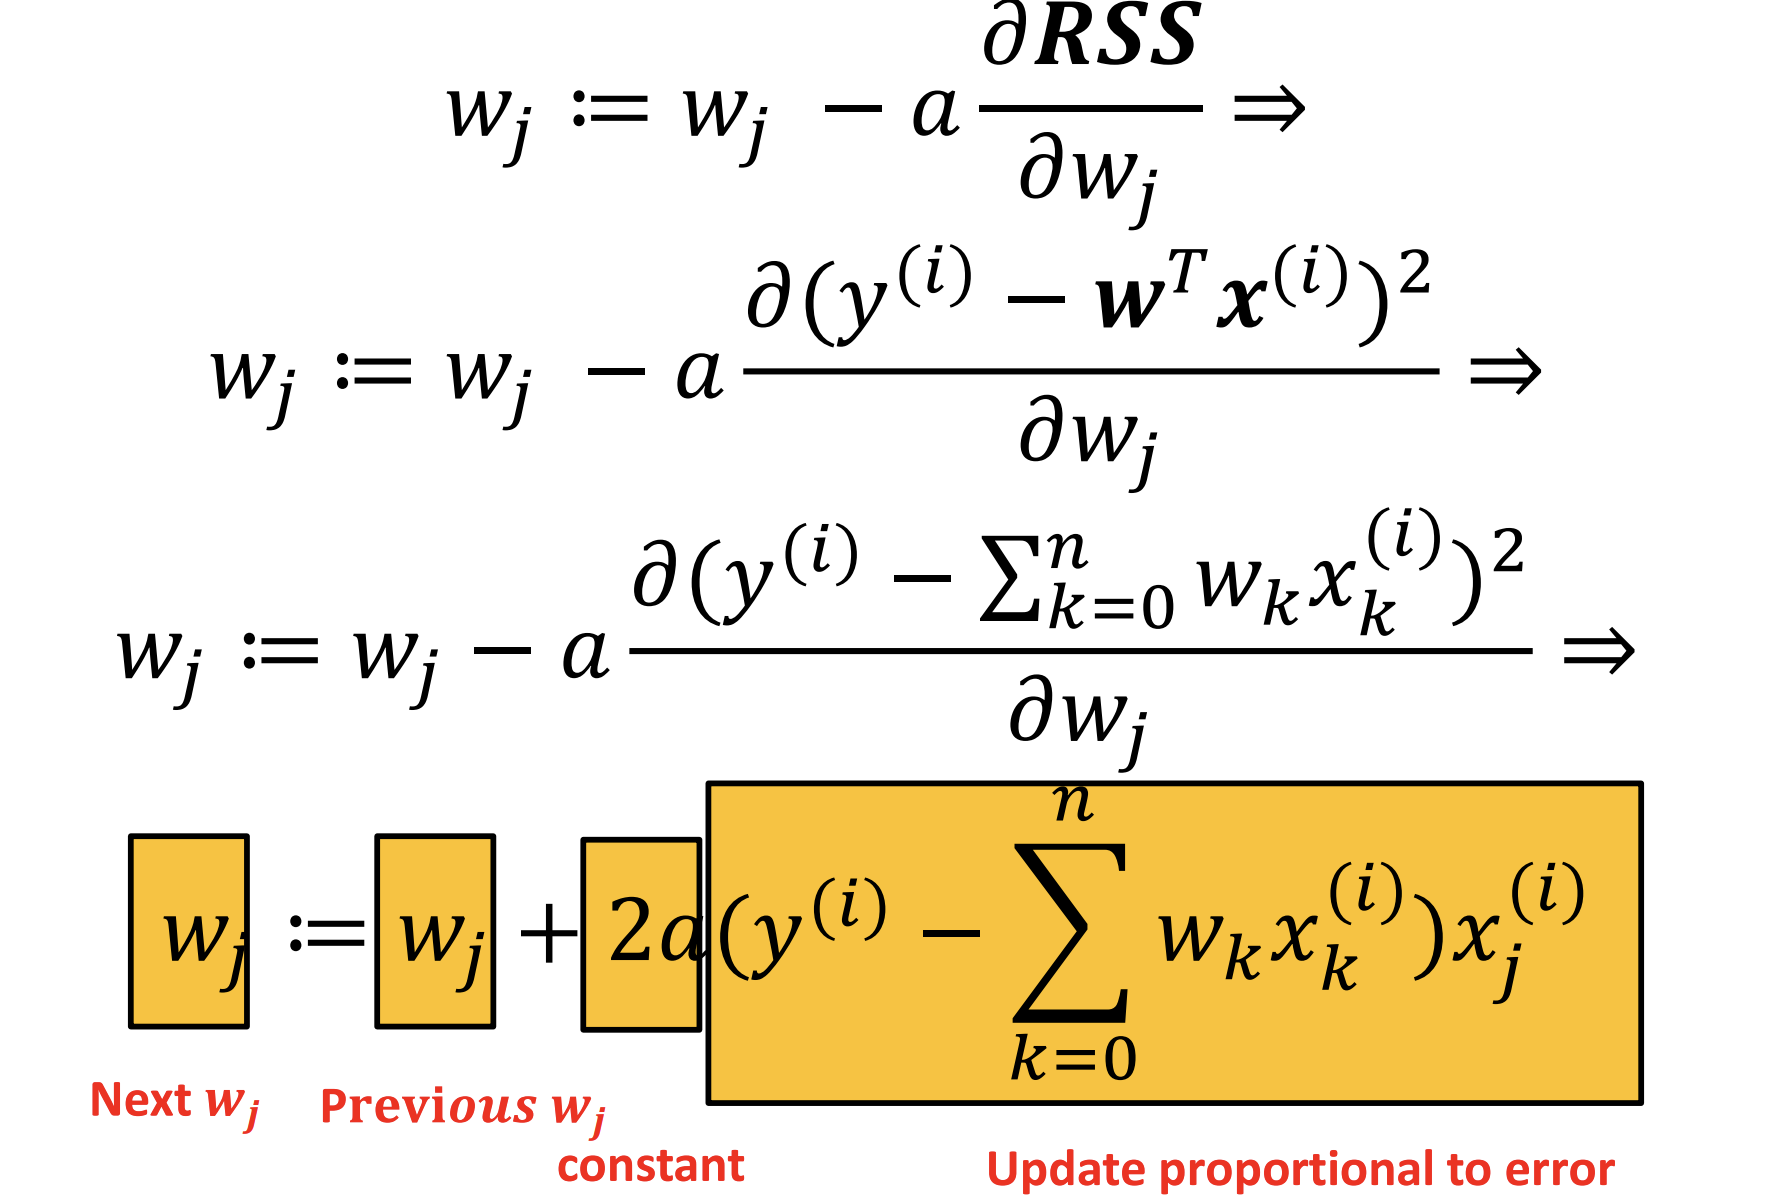

or
$$
\nabla_{\mathbf{w}} \text{RSS}(\mathbf{w}) = -2 \mathbf{X}^\top (\mathbf{y} - \mathbf{Xw}).
$$

Below is an implementation of batch gradient descent that tracks the RSS at each iteration and returns the estimated weights and the cost history.

Gradient descent weights after 200 iterations: w0 = 4.108, w1 = 2.885


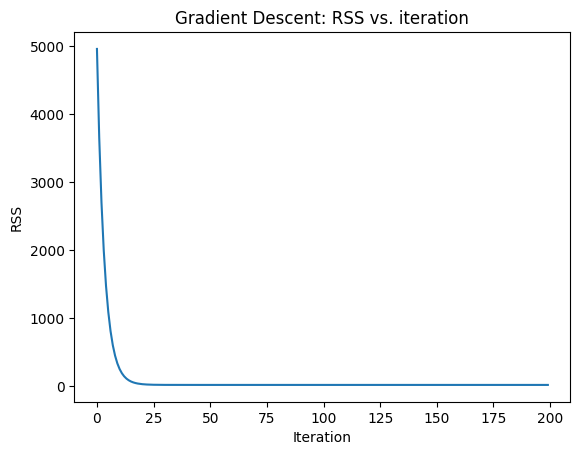

In [13]:

# Batch gradient descent implementation
def gradient_descent(X, y, learning_rate=0.05, n_iters=1000):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []

    for _ in range(n_iters):
        # Predictions
        y_pred = X.dot(w)
        error = y_pred - y

        # Gradient of RSS
        gradient = (2/m) * X.T.dot(error)

        # Update weights
        w -= learning_rate * gradient

        # Compute cost (RSS)
        cost = np.sum(error ** 2)
        cost_history.append(cost)

    return w, cost_history

# Run gradient descent
alpha = 0.45
n_iter = 200
w_gd, rss_history = gradient_descent(X, y, learning_rate=alpha, n_iters=n_iter)

print(f"Gradient descent weights after {n_iter} iterations: w0 = {w_gd[0]:.3f}, w1 = {w_gd[1]:.3f}")

# Plot cost (RSS) over iterations
plt.plot(range(len(rss_history)), rss_history)
plt.xlabel("Iteration")
plt.ylabel("RSS")
plt.title("Gradient Descent: RSS vs. iteration")
plt.show()



## 6 Comparing OLS and Gradient Descent

Both OLS and gradient descent attempt to minimize the RSS.  The OLS solution is exact (assuming $\mathbf{X}^	op\mathbf{X}$ is invertible), whereas gradient descent is an iterative approximation that can converge to the same solution when a suitable learning rate and sufficient iterations are used.  Let's compare the weight estimates.


In [14]:

# Display differences between OLS and GD estimates
print(f"OLS weights    : {w_ols}")
print(f"Gradient descent: {w_gd}")
print(f"Difference      : {w_ols - w_gd}")


OLS weights    : [4.10754808 2.88505669]
Gradient descent: [4.10754808 2.88505669]
Difference      : [1.78523862e-13 2.03392858e-13]



## 7 Conclusion

In this notebook we introduced linear regression, formulated the problem in matrix form, and defined the residual sum of squares (RSS) cost function.  We derived the closed‑form ordinary least squares (OLS) solution and applied it to a synthetic dataset.  We then implemented gradient descent to minimize RSS iteratively and observed how the cost decreased over time.  Finally, we compared the weights obtained via OLS and gradient descent.  This demonstrates how linear regression parameters can be learned analytically or through optimization



## 8 Effect of learning rate in Gradient Descent

To illustrate how the learning rate influences the path of gradient descent, consider the function

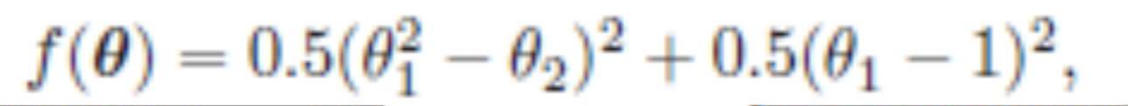$$f(oldsymbol{	heta}) = 	frac{1}{2}ig(	heta_1^2 - 	heta_2ig)^2 + 	frac{1}{2}ig(	heta_1 - 1ig)^2.$$

This function has a global minimum at \((1,1)\).  We can apply gradient descent starting from \((0,0)\) with different learning rates (step sizes) and visualize the resulting trajectories.  A smaller learning rate tends to produce a smoother path towards the minimum, while a larger one can overshoot or oscillate.  The following code plots contour lines of the function and the gradient descent paths for two learning rates.


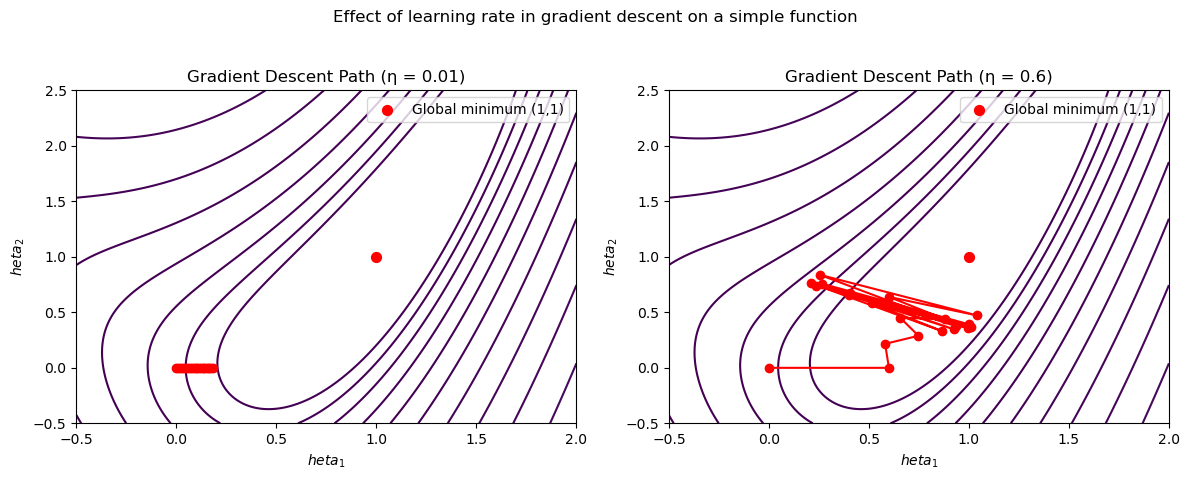

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its gradient
def f(theta1, theta2):
    return 0.5 * (theta1**2 - theta2)**2 + 0.5 * (theta1 - 1)**2

def grad(theta):
    theta1, theta2 = theta
    # Gradient components
    g1 = 2 * theta1 * (theta1**2 - theta2) + (theta1 - 1)  # df/dtheta1
    g2 = -(theta1**2 - theta2)                             # df/dtheta2
    return np.array([g1, g2])

# Create a grid for contour plotting
x = np.linspace(-0.5, 2.0, 200)
y = np.linspace(-0.5, 2.5, 200)
X_grid, Y_grid = np.meshgrid(x, y)
Z_grid = f(X_grid, Y_grid)

# Learning rates to demonstrate
etas = [0.01, 0.6]
paths = []

for eta in etas:
    theta = np.array([0.0, 0.0])
    path = [theta.copy()]
    # Run 20 iterations of gradient descent
    for _ in range(20):
        theta = theta - eta * grad(theta)
        path.append(theta.copy())
    paths.append(np.array(path))

# Plot the contour and the paths
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, eta, path in zip(axes, etas, paths):
    # Contour plot
    levels = np.logspace(-0.5, 2.5, 20)
    ax.contour(X_grid, Y_grid, Z_grid, levels=levels, cmap='viridis')

    # Plot the path
    ax.plot(path[:,0], path[:,1], 'o-', color='red')
    ax.scatter(1, 1, marker='o', color='red', s=50, label='Global minimum (1,1)')

    ax.set_title(f"Gradient Descent Path (η = {eta})")
    ax.set_xlabel(r"$	heta_1$")
    ax.set_ylabel(r"$	heta_2$")
    ax.set_xlim(-0.5, 2.0)
    ax.set_ylim(-0.5, 2.5)
    ax.legend()

plt.suptitle("Effect of learning rate in gradient descent on a simple function")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
